In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import tensorflow as tf

In [49]:
df = pd.read_excel('./Data/Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [50]:
df.columns = ['cement', 'furnace', 'ash', 'water', 'superplacsticizer', 'coarse', 'fine', 'age', 'strength']

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cement             1030 non-null   float64
 1   furnace            1030 non-null   float64
 2   ash                1030 non-null   float64
 3   water              1030 non-null   float64
 4   superplacsticizer  1030 non-null   float64
 5   coarse             1030 non-null   float64
 6   fine               1030 non-null   float64
 7   age                1030 non-null   int64  
 8   strength           1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [52]:
df

,cement,furnace,ash,water,superplacsticizer,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [53]:
# strength를 예측하는 neural network model을 만들고 평가하시오

In [74]:
y = df.values[:, 8]
x = df.values[:, :8]

# y = df.strength
# x = df.loc[:, :'age']

In [75]:
x.shape

(1030, 8)

In [76]:
y.shape        # y : regression

(1030,)

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=111)

In [78]:
model = Sequential()
model.add(Dense(256, input_dim = 8, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(56, activation = 'relu'))
model.add(Dense(28, activation = 'relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 256)               2304      
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dense_24 (Dense)            (None, 56)                7224      
                                                                 
 dense_25 (Dense)            (None, 28)                1596      
                                                                 
 dense_26 (Dense)            (None, 1)                 29        
                                                                 
Total params: 44,049
Trainable params: 44,049
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [80]:
hist = model.fit(x_train, y_train, validation_split=0.2, epochs = 100, batch_size = 10)

Epoch 1/100
62/62 [==============================] - 0s 2ms/step - loss: 316.1706 - val_loss: 155.5375
Epoch 2/100
62/62 [==============================] - 0s 1ms/step - loss: 157.1549 - val_loss: 119.8029
Epoch 3/100
62/62 [==============================] - 0s 1ms/step - loss: 106.3806 - val_loss: 109.6483
Epoch 4/100
62/62 [==============================] - 0s 1ms/step - loss: 100.7739 - val_loss: 78.9170
Epoch 5/100
62/62 [==============================] - 0s 1ms/step - loss: 95.4493 - val_loss: 72.3472
Epoch 6/100
62/62 [==============================] - 0s 1ms/step - loss: 70.1123 - val_loss: 65.9735
Epoch 7/100
62/62 [==============================] - 0s 1ms/step - loss: 73.3038 - val_loss: 81.6516
Epoch 8/100
62/62 [==============================] - 0s 1ms/step - loss: 84.7399 - val_loss: 62.2253
Epoch 9/100
62/62 [==============================] - 0s 1ms/step - loss: 91.8617 - val_loss: 68.2034
Epoch 10/100
62/62 [==============================] - 0s 1ms/step - loss: 69.9611 - 

62/62 [==============================] - 0s 1ms/step - loss: 34.0289 - val_loss: 30.0379
Epoch 82/100
62/62 [==============================] - 0s 1ms/step - loss: 34.8422 - val_loss: 41.7624
Epoch 83/100
62/62 [==============================] - 0s 1ms/step - loss: 37.2409 - val_loss: 31.9381
Epoch 84/100
62/62 [==============================] - 0s 1ms/step - loss: 35.9830 - val_loss: 31.2060
Epoch 85/100
62/62 [==============================] - 0s 1ms/step - loss: 36.6522 - val_loss: 27.8161
Epoch 86/100
62/62 [==============================] - 0s 1ms/step - loss: 35.1288 - val_loss: 43.7531
Epoch 87/100
62/62 [==============================] - 0s 1ms/step - loss: 39.9770 - val_loss: 33.0091
Epoch 88/100
62/62 [==============================] - 0s 1ms/step - loss: 31.6541 - val_loss: 27.5178
Epoch 89/100
62/62 [==============================] - 0s 1ms/step - loss: 33.0583 - val_loss: 32.1461
Epoch 90/100
62/62 [==============================] - 0s 1ms/step - loss: 40.9628 - val_loss: 4

In [90]:
preds = model.predict(x_test)

In [91]:
preds = [v[0] for v in preds]
preds

[45.234512,
 18.599344,
 33.856678,
 31.581087,
 54.85448,
 34.55397,
 16.8701,
 12.222377,
 21.61833,
 20.947243,
 35.996166,
 32.608894,
 32.60633,
 53.386784,
 41.80743,
 53.96004,
 30.268549,
 22.187494,
 25.330582,
 18.429703,
 19.036146,
 27.109417,
 24.051832,
 23.683468,
 40.840466,
 39.04881,
 22.78266,
 18.698074,
 62.663128,
 44.007145,
 60.070286,
 37.56758,
 45.92792,
 35.384495,
 27.69917,
 39.296307,
 36.738102,
 35.832203,
 39.03323,
 27.648384,
 76.42651,
 40.4529,
 27.739885,
 31.538303,
 38.147427,
 30.684225,
 42.35803,
 14.824098,
 30.210785,
 21.664173,
 39.637962,
 59.76402,
 30.654608,
 36.377148,
 37.437626,
 50.02612,
 43.723248,
 41.440376,
 32.43619,
 28.05841,
 32.511837,
 13.869908,
 47.178135,
 36.89922,
 64.87576,
 24.292648,
 20.01802,
 49.865597,
 52.389996,
 70.18339,
 38.019264,
 41.336185,
 37.82293,
 35.040237,
 45.920708,
 24.12713,
 12.704071,
 63.95226,
 51.6961,
 48.407673,
 53.24661,
 38.52603,
 36.814064,
 41.603455,
 36.962658,
 73.058685,
 

In [92]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.8551830422819431

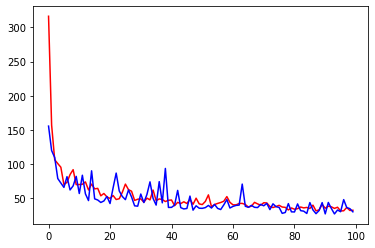

In [85]:
plt.plot(hist.history['loss'], c = 'r')
plt.plot(hist.history['val_loss'], c = 'b')

In [86]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 751us/step - loss: 41.1071


41.107120513916016

In [ ]:
# 스케일링

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [94]:
model = Sequential()
model.add(Dense(256, input_dim = 8, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(56, activation = 'relu'))
model.add(Dense(28, activation = 'relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 256)               2304      
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 56)                7224      
                                                                 
 dense_30 (Dense)            (None, 28)                1596      
                                                                 
 dense_31 (Dense)            (None, 1)                 29        
                                                                 
Total params: 44,049
Trainable params: 44,049
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [96]:
hist = model.fit(x_train_sc, y_train, validation_split=0.2, epochs = 100, batch_size = 20)

Epoch 1/100
31/31 [==============================] - 0s 4ms/step - loss: 1161.0325 - val_loss: 366.1283
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 283.8952 - val_loss: 228.0528
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 215.1258 - val_loss: 182.2231
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 185.3876 - val_loss: 167.4604
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 167.7595 - val_loss: 160.7509
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 160.3152 - val_loss: 154.3898
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 145.8704 - val_loss: 145.1348
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 134.2861 - val_loss: 149.2215
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 128.2587 - val_loss: 137.1149
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss

31/31 [==============================] - 0s 2ms/step - loss: 15.0594 - val_loss: 30.1798
Epoch 82/100
31/31 [==============================] - 0s 2ms/step - loss: 17.5213 - val_loss: 28.6090
Epoch 83/100
31/31 [==============================] - 0s 2ms/step - loss: 12.4830 - val_loss: 29.4403
Epoch 84/100
31/31 [==============================] - 0s 2ms/step - loss: 10.9286 - val_loss: 27.7515
Epoch 85/100
31/31 [==============================] - 0s 2ms/step - loss: 10.9410 - val_loss: 31.0012
Epoch 86/100
31/31 [==============================] - 0s 2ms/step - loss: 11.8971 - val_loss: 31.1669
Epoch 87/100
31/31 [==============================] - 0s 2ms/step - loss: 12.1678 - val_loss: 26.8210
Epoch 88/100
31/31 [==============================] - 0s 2ms/step - loss: 12.0539 - val_loss: 26.6144
Epoch 89/100
31/31 [==============================] - 0s 2ms/step - loss: 11.1116 - val_loss: 29.0038
Epoch 90/100
31/31 [==============================] - 0s 2ms/step - loss: 11.5023 - val_loss: 3

In [99]:
preds = model.predict(x_test_sc)

In [100]:
r2_score(y_test, preds)

0.861414098879475

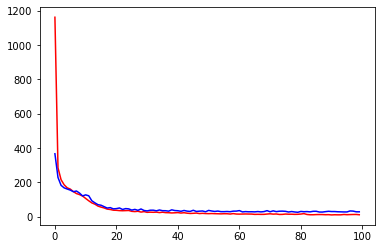

In [101]:
plt.plot(hist.history['loss'], c = 'r')
plt.plot(hist.history['val_loss'], c = 'b')

In [102]:
model.evaluate(x_test_sc, y_test)

9/9 [==============================] - 0s 876us/step - loss: 39.3384


39.33839797973633